In [249]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [250]:
os.chdir('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/')
result = pd.read_csv('https://raw.githubusercontent.com/rr2734/rashmir/refs/heads/main/train.csv')
result.head(5)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [251]:
print(result.head(5))
print(result.info())
print(result.isnull().sum())
print(result.duplicated().sum())


print(result.describe(include = 'all'))

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [252]:
result= result.drop(columns=['LotFrontage', 'MasVnrArea','GarageYrBlt'])

In [253]:
result.corr()

Id  MSSubClass   LotArea  OverallQual  OverallCond  \
Id             1.000000    0.011156 -0.033226    -0.028365     0.012609   
MSSubClass     0.011156    1.000000 -0.139781     0.032628    -0.059316   
LotArea       -0.033226   -0.139781  1.000000     0.105806    -0.005636   
OverallQual   -0.028365    0.032628  0.105806     1.000000    -0.091932   
OverallCond    0.012609   -0.059316 -0.005636    -0.091932     1.000000   
YearBuilt     -0.012713    0.027850  0.014228     0.572323    -0.375983   
YearRemodAdd  -0.021998    0.040581  0.013788     0.550684     0.073741   
BsmtFinSF1    -0.005024   -0.069836  0.214103     0.239666    -0.046231   
BsmtFinSF2    -0.005968   -0.065649  0.111170    -0.059119     0.040229   
BsmtUnfSF     -0.007940   -0.140759 -0.002618     0.308159    -0.136841   
TotalBsmtSF   -0.015415   -0.238518  0.260833     0.537808    -0.171098   
1stFlrSF       0.010496   -0.251758  0.299475     0.476224    -0.144203   
2ndFlrSF       0.005590    0.307886  0.050986     0.295493     0.028942   
LowQualFinSF  -0.044230    0.046474  0.004779    -0.030429     0.025494   
GrLivArea      0.008273    0.074853  0.263116     0.593007    -0.079686   
BsmtFullBath   0.002289    0.003491  0.158155     0.111098    -0.054942   
BsmtHalfBath  -0.020155   -0.002333  0.048046    -0.040150     0.117821   
FullBath       0.005587    0.131608  0.126031     0.550600    -0.194149   
HalfBath       0.006784    0.177354  0.014259     0.273458    -0.060769   
BedroomAbvGr   0.037719   -0.023438  0.119690     0.101676     0.012980   
KitchenAbvGr   0.002951    0.281721 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd   0.027239    0.040380  0.190015     0.427452    -0.057583   
Fireplaces    -0.019772   -0.045569  0.271364     0.396765    -0.023820   
GarageCars     0.016570   -0.040110  0.154871     0.600671    -0.185758   
GarageArea     0.017634   -0.098672  0.180403     0.562022    -0.151521   
WoodDeckSF    -0.029643   -0.012579  0.171698     0.238923    -0.003334   
OpenPorchSF   -0.000477   -0.006100  0.084774     0.308819    -0.032589   
EnclosedPorch  0.002889   -0.012037 -0.018340    -0.113937     0.070356   
3SsnPorch     -0.046635   -0.043825  0.020423     0.030371     0.025504   
ScreenPorch    0.001330   -0.026030  0.043160     0.064886     0.054811   
PoolArea       0.057044    0.008283  0.077672     0.065166    -0.001985   
MiscVal       -0.006242   -0.007683  0.038068    -0.031406     0.068777   
MoSold         0.021172   -0.013585  0.001205     0.070815    -0.003511   
YrSold         0.000712   -0.021407 -0.014261    -0.027347     0.043950   
SalePrice     -0.021917   -0.084284  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
Id             -0.012713     -0.021998   -0.005024   -0.005968  -0.007940   
MSSubClass      0.027850      0.040581   -0.069836   -0.065649  -0.140759   
LotArea         0.014228      0.013788    0.214103    0.111170  -0.002618   
OverallQual     0.572323      0.550684    0.239666   -0.059119   0.308159   
OverallCond    -0.375983      0.073741   -0.046231    0.040229  -0.136841   
YearBuilt       1.000000      0.592855    0.249503   -0.049107   0.149040   
YearRemodAdd    0.592855      1.000000    0.128451   -0.067759   0.181133   
BsmtFinSF1      0.249503      0.128451    1.000000   -0.050117  -0.495251   
BsmtFinSF2     -0.049107     -0.067759   -0.050117    1.000000  -0.209294   
BsmtUnfSF       0.149040      0.181133   -0.495251   -0.209294   1.000000   
TotalBsmtSF     0.391452      0.291066    0.522396    0.104810   0.415360   
1stFlrSF        0.281986      0.240379    0.445863    0.097117   0.317987   
2ndFlrSF        0.010308      0.140024   -0.137079   -0.099260   0.004469   
LowQualFinSF   -0.183784     -0.062419   -0.064503    0.014807   0.028167   
GrLivArea       0.199010      0.287389    0.208171   -0.009640   0.240257   
BsmtFullBath    0.187599      0.119470    0.649212    0.158678  -0.422900   
BsmtHalfBat

In [256]:
numeric_cols=result.select_dtypes(include=['int64','float64']).columns.tolist()
object_cols = result.select_dtypes(include='object').columns.tolist()
result_encoded=pd.get_dummies(result,columns =object_cols, drop_first =True)
print(result_encoded)

        Id  MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  \
0        1          60     8450            7            5       2003   
1        2          20     9600            6            8       1976   
2        3          60    11250            7            5       2001   
3        4          70     9550            7            5       1915   
4        5          60    14260            8            5       2000   
5        6          50    14115            5            5       1993   
6        7          20    10084            8            5       2004   
7        8          60    10382            7            6       1973   
8        9          50     6120            7            5       1931   
9       10         190     7420            5            6       1939   
10      11          20    11200            5            5       1965   
11      12          60    11924            9            5       2005   
12      13          20    12968            5            6       

In [257]:
numeric_cols=result.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols.pop()
print(numeric_cols)

['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [260]:
numerical_features = result_encoded[numeric_cols]
categorical_features = result_encoded.drop(columns=numeric_cols)
scaler = StandardScaler()
scaled_numerical_features = pd.DataFrame(scaler.fit_transform(numerical_features), 
                                         columns=numerical_features.columns, 
                                         index=numerical_features.index)
result_final = pd.concat([scaled_numerical_features, categorical_features], axis=1)
result_final1=pd.concat([scaled_numerical_features, categorical_features,result['SalePrice']], axis=1)
result_final1.to_excel('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/OUTPUTTOEXCEL.xlsx', index=False)

In [261]:
print(result_final1.index)

RangeIndex(start=0, stop=1460, step=1)


In [262]:
X = result_final
Y=result['SalePrice']

In [263]:
X=sm.add_constant(X) #For statsmodels

C:\Users\student1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [264]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [266]:
model_sm = sm.OLS(Y_train, X_train).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.132e+28
Date:                Sat, 09 Aug 2025   Prob (F-statistic):               0.00
Time:                        18:56:49   Log-Likelihood:                 22724.
No. Observations:                1168   AIC:                        -4.497e+04
Df Residuals:                     928   BIC:                        -4.375e+04
Df Model:                         239                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6.694e-

In [267]:
model_sk = LinearRegression()
model_sk.fit(X_train, Y_train)
print(f"Coefficients: {model_sk.coef_}")
print(f"Intercept: {model_sk.intercept_}")

Coefficients: [-2.60106758e-19  2.70312661e-11  6.38792759e-12 -1.72844574e-12
 -6.14230172e-11  2.21699317e-12  6.69829794e-12 -8.65694142e-12
 -2.39253739e-12  2.19921550e-13  8.61016199e-12  6.26583130e-12
 -1.76718506e-11  6.01535676e-12  1.45597036e-12 -7.86906631e-12
  2.77975559e-12 -1.91560693e-12  3.44109980e-12  4.77880782e-13
  8.32214000e-12  8.35551697e-13 -2.72365979e-12  3.09890408e-12
  1.93789687e-12  9.57583884e-13 -1.78825307e-12  1.43002097e-12
  1.91057095e-12 -1.02771774e-12 -2.58490554e-12  9.09303082e-13
  1.13382420e-12  3.50036300e-13  7.67878362e-13  1.00000000e+00
 -2.15762595e-11  1.64803049e-11  2.18107888e-11  1.63197245e-11
  2.45992333e-11 -1.80153666e-11  5.44008970e-13  1.02557881e-11
 -2.90854406e-12 -5.76749093e-12  7.96232528e-12  5.59269090e-12
  4.26894322e-12 -4.83942124e-13 -2.83913110e-12 -1.94574771e-11
  3.22796506e-13  6.35371170e-12  1.53390005e-11 -9.10385402e-12
 -5.69393477e-12  9.40900757e-12  3.94830939e-12  1.18535091e-11
  2.8580464

In [269]:
abs_coeff = np.abs(model_sk.coef_)
print(np.max(abs_coeff))
indices = np.where(model_sk.coef_ == 0.9999999999999979)[0]
print(indices)

0.9999999999999979
[35]


In [270]:
X_train.iloc[:,34]

254     1.645210
1066    0.891994
638     0.138777
799    -0.614439
380     1.645210
303    -1.367655
86      0.891994
1385    1.645210
265     0.138777
793    -0.614439
1445   -0.614439
808    -1.367655
1099    0.891994
605     0.891994
701    -1.367655
221     0.891994
113    -0.614439
548     0.138777
1073    0.891994
174     0.138777
514    -0.614439
1350    0.891994
1145   -1.367655
965    -0.614439
936     0.891994
285    -0.614439
1310    1.645210
342    -1.367655
1165    0.891994
31      0.138777
          ...   
747     0.891994
252     0.138777
21     -0.614439
1337   -1.367655
459     0.891994
1184   -0.614439
276     1.645210
955    -0.614439
1215   -0.614439
385     1.645210
805     0.138777
1437    0.138777
343     0.138777
769     1.645210
1332    0.891994
130    -1.367655
871     1.645210
1123    0.891994
1396    1.645210
87      0.891994
330    -0.614439
1238   -1.367655
466    -0.614439
121    -0.614439
1044    0.891994
1095   -0.614439
1130    0.891994
1294   -1.3676

In [271]:
Y_pred = model_sk.predict(X_test)
r_squared = r2_score(Y_test, Y_pred)
print(f"R-squared: {r_squared}")

R-squared: 1.0


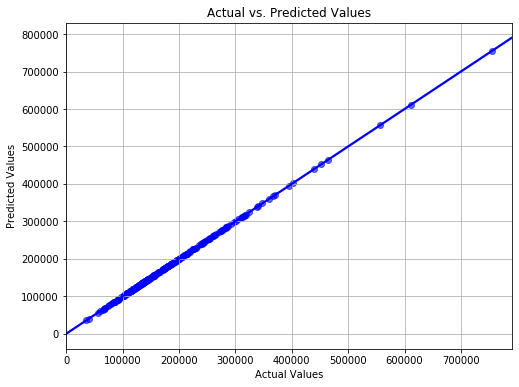

In [272]:
plt.figure(figsize=(8, 6))
sns.regplot(x=Y_test, y=Y_pred, ci=None, color='blue', scatter_kws={'alpha':0.6})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [273]:
#Decision Tree Regression
from sklearn.tree import DecisionTreeClassifier, plot_tree
result_classifier = DecisionTreeClassifier(random_state=42)

In [274]:
result_classifier.fit(X, Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [275]:
Y_pred = result_classifier.predict(X_test)
X.columns.tolist()
#Too many features to create figure

['const',
 'Id',
 'MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice',
 'MSZoning_FV',
 'MSZoning_RH',
 'MSZoning_RL',
 'MSZoning_RM',
 'Street_Pave',
 'Alley_Pave',
 'LotShape_IR2',
 'LotShape_IR3',
 'LotShape_Reg',
 'LandContour_HLS',
 'LandContour_Low',
 'LandContour_Lvl',
 'Utilities_NoSeWa',
 'LotConfig_CulDSac',
 'LotConfig_FR2',
 'LotConfig_FR3',
 'LotConfig_Inside',
 'LandSlope_Mod',
 'LandSlope_Sev',
 'Neighborhood_Blueste',
 'Neighborhood_BrDale',
 'Neighborhood_BrkSide',
 'Neighborhood_ClearCr',
 'Neighborhood_CollgCr',
 'Neighborhood

In [276]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred) #
print(f"Accuracy of the Decision Tree Classifier: {accuracy:.2f}")


Accuracy of the Decision Tree Classifier: 1.00


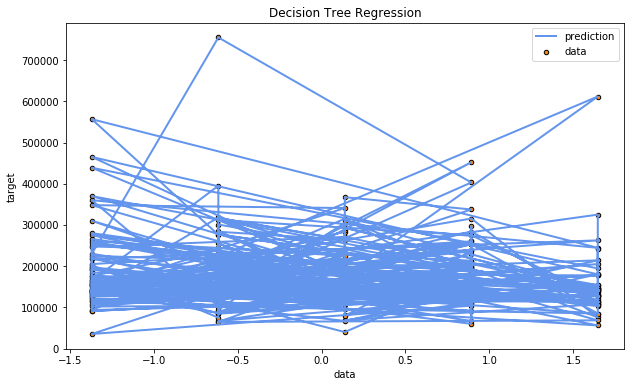

In [277]:
    plt.figure(figsize=(10, 6))
    plt.scatter(X_test['YrSold'], Y_test, s=20, edgecolor="black", c="darkorange", label="data")
    plt.plot(X_test['YrSold'], Y_pred, color="cornflowerblue", label="prediction", linewidth=2)
    plt.xlabel("data")
    plt.ylabel("target")
    plt.title("Decision Tree Regression")
    plt.legend()
    plt.show()

In [278]:
X_test_kaggle = pd.read_csv('https://raw.githubusercontent.com/rr2734/rashmir/refs/heads/main/test.csv')

In [279]:
X_test_kaggle= X_test_kaggle.drop(columns=['LotFrontage', 'MasVnrArea','GarageYrBlt'])

In [280]:
X_test_kaggle_encoded=pd.get_dummies(X_test_kaggle,columns =object_cols, drop_first =True)
numerical_features_kaggle = X_test_kaggle_encoded[numeric_cols]
categorical_features_kaggle = X_test_kaggle_encoded.drop(columns=numeric_cols)
scaler = StandardScaler()
scaled_numerical_features_kaggle = pd.DataFrame(scaler.fit_transform(numerical_features_kaggle), 
                                         columns=numerical_features_kaggle.columns, 
                                         index=numerical_features_kaggle.index)
X_test_kaggle_final = pd.concat([scaled_numerical_features_kaggle, categorical_features_kaggle], axis=1)


In [281]:
X_test_kaggle_cleaned = X_test_kaggle_final.dropna()
print(X_test_kaggle_cleaned)

            Id  MSSubClass   LotArea  OverallQual  OverallCond  YearBuilt  \
0    -1.730864   -0.874711  0.363929    -0.751101     0.400766  -0.340945   
1    -1.728490   -0.874711  0.897861    -0.054877     0.400766  -0.439695   
2    -1.726115    0.061351  0.809646    -0.751101    -0.497418   0.844059   
3    -1.723741    0.061351  0.032064    -0.054877     0.400766   0.876976   
4    -1.721367    1.465443 -0.971808     1.337571    -0.497418   0.679475   
5    -1.718993    0.061351  0.036505    -0.054877    -0.497418   0.712392   
6    -1.716618   -0.874711 -0.371261    -0.054877     1.298950   0.679475   
7    -1.714244    0.061351 -0.286074    -0.054877    -0.497418   0.876976   
8    -1.711870   -0.874711  0.072033     0.641347    -0.497418   0.613642   
9    -1.709495   -0.874711 -0.286478    -1.447325    -0.497418  -0.044694   
10   -1.707121    1.465443 -0.799618     0.641347    -0.497418   0.909893   
11   -1.704747    2.401505 -1.643007    -0.054877    -0.497418  -0.011777   

In [282]:
#Y_pred_kaggle = result_classifier.predict(X_test_kaggle_cleaned)
#ValueError: Number of features of the model must match the input. Model n_features is 245 and input n_features is 225 

In [283]:
#EDA


In [284]:
for column1 in result:
    print(column1,':',result[column1].dtype)


Id : int64
MSSubClass : int64
MSZoning : object
LotArea : int64
Street : object
Alley : object
LotShape : object
LandContour : object
Utilities : object
LotConfig : object
LandSlope : object
Neighborhood : object
Condition1 : object
Condition2 : object
BldgType : object
HouseStyle : object
OverallQual : int64
OverallCond : int64
YearBuilt : int64
YearRemodAdd : int64
RoofStyle : object
RoofMatl : object
Exterior1st : object
Exterior2nd : object
MasVnrType : object
ExterQual : object
ExterCond : object
Foundation : object
BsmtQual : object
BsmtCond : object
BsmtExposure : object
BsmtFinType1 : object
BsmtFinSF1 : int64
BsmtFinType2 : object
BsmtFinSF2 : int64
BsmtUnfSF : int64
TotalBsmtSF : int64
Heating : object
HeatingQC : object
CentralAir : object
Electrical : object
1stFlrSF : int64
2ndFlrSF : int64
LowQualFinSF : int64
GrLivArea : int64
BsmtFullBath : int64
BsmtHalfBath : int64
FullBath : int64
HalfBath : int64
BedroomAbvGr : int64
KitchenAbvGr : int64
KitchenQual : object
TotRmsA

In [285]:
#UPDATE FILE PATH TO SAVE FREQUENCY GRAPHS OF CATEGORICAL VARS
k=0
for column1 in result:
    if result[column1].dtype==object:
        print(result[column1].unique())
        print(result[column1].value_counts())
        fig = result[column1].value_counts().plot.bar(title = "Freq Dist of"+column1+"Indicator")
        fig1 = fig.figure
        #print(result[column1].value_counts().plot.bar(title = "Freq Dist of"+column1+"Indicator"))
        filename = os.path.join('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/Frequency Graphs', f'figure_{k+1}.png')
        plt.savefig(filename)  # Save the figure to a fileC
        k=k+1
        plt.xlabel(column1)
        plt.ylabel("Frequency")
        plt.close(fig1) 

['RL' 'RM' 'C (all)' 'FV' 'RH']
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
['Pave' 'Grvl']
Pave    1454
Grvl       6
Name: Street, dtype: int64
[nan 'Grvl' 'Pave']
Grvl    50
Pave    41
Name: Alley, dtype: int64
['Reg' 'IR1' 'IR2' 'IR3']
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
['Lvl' 'Bnk' 'Low' 'HLS']
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
['AllPub' 'NoSeWa']
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
['Gtl' 'Mod' 'Sev']
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'N

In [286]:
#BOXPLOT AND HISTOGRAMS 
#UPDATE FILE PATHS TO SAVE BOXPLOTS AND HISTOGRAMS OF NUMERIC VARS
i=0
for column1 in result:
    if result[column1].dtype =='int64' or result[column1].dtype == 'float64':
        print(column1, result[column1].describe())
        print(result[column1].dtype)
        result[column1] = pd.to_numeric(result[column1])
        plt.figure(1)
        plt.subplot(121)
        fig1= sns.boxplot(result[column1], orient = 'v');
        fig11=fig1.figure
        plt.title('Boxplot of '+column1)
        plt.xlabel(' ')
        filename = os.path.join('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/Boxplot Numeric Variables', f'figure_{i+1}.png')
        plt.savefig(filename)  
        plt.close(fig11) 
        
        fig2=plt.subplot(122)
        fig3=sns.distplot(result[column1], bins = 10)
        fig4 = fig3.figure
        plt.title('Histogram of '+column1)
        filename1 = os.path.join('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/Histogram of Numeric Variables', f'figure_{i+1}.png')
        plt.savefig(filename1)  # Save the figure to a fileC
        plt.close(fig4)  # Close the figure to free up memory and prevent display
        i=i+1
        #plt.show();

Id count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64
int64
MSSubClass count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64
int64
LotArea count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64
int64
OverallQual count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
25%         5.000000
50%         6.000000
75%         7.000000
max        10.000000
Name: OverallQual, dtype: float64
int64
OverallCond count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
25%         5.000000
50%         5.0

In [289]:
###Bivariate Analysis Numeric vs. Numeric
i=0
for column1 in result:
        if (result[column1].dtype =='int64' or result[column1].dtype=='float64'):
            fig=plt.figure()
            plt.scatter(x = column1, y = 'SalePrice', data = result)
            plt.title(column1+"  vs. SalePrice")
            plt.xlabel(column1)
            plt.ylabel('SalePrice')
            #plt.show(block=False)
            filename = os.path.join('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/Bivariate Analyses Numeric 1', f'figure_{i+1}.png')
            plt.savefig(filename)  # Save the figure to a fileC
            plt.close(fig)  # Close the figure to free up memory and prevent display
            i=i+1



In [290]:
#CATEGORICAL VARIABLE VS SALEPRICE
c=0
for column_c in result:
    if (result[column_c].dtype =='object'):
        fig = sns.catplot(data=result, x=column_c, y="SalePrice")
        fig1 = fig.fig
        filename = os.path.join('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/Categorical Plots vs SalePrice', f'figure_{c+1}.png')
        plt.savefig(filename)  # Save the figure to a fileC
        plt.close(fig1)  # Close the figure to free up memory and prevent display
        c=c+1

In [291]:
#MULTIVARIATE PLOTS MSZONING VS CATEGORICAL VAR VS SALEPRICE UPDATE FILEPATH
i=0
for column1 in result:
    if result[column1].dtype ==object:    
        fig1= sns.catplot(x='MSZoning', y='SalePrice', hue=column1, kind='bar', data=result);
        fig11=fig1.fig
        plt.title('SalePrice Vs. MSZoning with Hue ' +column1)
        plt.xlabel('MSZoning')
        plt.ylabel('SalePrice')
        filename = os.path.join('C:/Users/student1/Desktop/CLASS/Python Project 2/Python Project 2 - Class/Multivariate Categorical x2 vs. Saleprice', f'figure_{i+1}.png')
        plt.savefig(filename)  
        plt.close(fig11) 
        i=i+1



In [292]:
 import pickle

    # Save the multilinear regression model
with open('multilinear_regression_model.pkl', 'wb') as f:
    pickle.dump(model_sk, f)

    # Save the decision tree classifier model
with open('decision_tree_classifier.pkl', 'wb') as f1:
    pickle.dump(result_classifier, f1)

In [293]:
with open('multilinear_regression_model.pkl', 'rb') as f:
    loaded_RM = pickle.load(f)

with open('decision_tree_classifier.pkl', 'rb') as f1:
    loaded_DT = pickle.load(f1)